# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [3]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [5]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df['title lenght'] = df['title'].apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title lenght
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [10]:
# Calcula media, mediana y moda de la columna 'title_length'

media = df['title lenght'].mean()
mediana = df['title lenght'].median()
moda = mode(df['title lenght'], keepdims=True).mode[0]

print(
    f"Media: {media}\nMediana: {mediana}\nModa: {moda}"
)

Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [16]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = df['title lenght'].max() - df['title lenght'].min()
varianza = df['title lenght'].var()
desviacion = np.std(df['title lenght'])

print(
    f"Rango: {rango}\nVarianza: {varianza}\nDesviación estándar: {desviacion}"
)

Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.487231316055734


In [25]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df["title lenght"])
curtosis = kurtosis(df["title lenght"])

print(
    f"Asimetría: {asimetria}\nCurtosis: {curtosis}"
)

Asimetría: 1.5229143965677572
Curtosis: 3.7867237597626007


In [7]:
# Imprime el título más corto y el título más largo según su longitud
largo = df.loc[df["title lenght"].idxmax(), "title"]
corto = df.loc[df["title lenght"].idxmin(), "title"]

print(f"Título más corto: {corto} \nTítulo mas largo: {largo}")

Título más corto: M 
Título mas largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


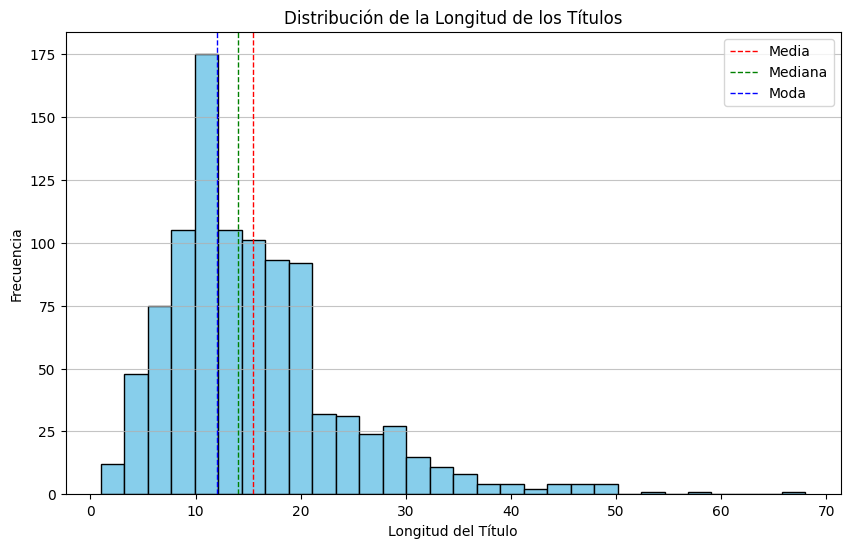

In [19]:
# grafica tus resultados
plt.figure(figsize=(10, 6))
plt.hist(df['title lenght'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Longitud de los Títulos')
plt.xlabel('Longitud del Título')
plt.ylabel('Frecuencia')

plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(moda, color='blue', linestyle='dashed', linewidth=1, label='Moda')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [21]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista = [10, 13, 14, 18, 22]

In [23]:
# Calcula la media de los 5 valores
media_lista = sum(lista) / len(lista)
media_lista

15.4

In [25]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado = sum([(x - media_lista) ** 2 for x in lista])
diferencias_cuadrado

87.19999999999999

In [27]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = diferencias_cuadrado / len(lista)
desviacion = varianza ** 0.5
varianza, desviacion

(17.439999999999998, 4.176122603564219)